# Classification with KNN

using wine27 dataset from MBCbook package

In [14]:
install.packages('MBCbook')

Warning message:
"package 'MBCbook' is in use and will not be installed"


In [15]:
warn=0
library(MBCbook)
warn=1

In [16]:
library(class)

In [17]:
data(wine27)
head(wine27)

,Alcohol,Sugar.free_extract,Fixed_acidity,Tartaric_acid,Malic_acid,Uronic_acids,pH,Ash,Alcalinity_of_ash,Potassium,...,Hue,OD280.OD315_of_diluted_wines,OD280.OD315_of_flavanoids,Glycerol,X2.3.butanediol,Total_nitrogen,Proline,Methanol,Type,Year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,14.23,24.82,73.1,1.21,1.71,0.72,3.38,2.43,15.6,950,...,1.04,3.92,4.77,9.29,757,153,1065,113,Barolo,1971
2,13.20,26.30,72.8,1.84,1.78,0.71,3.30,2.14,11.2,765,...,1.05,3.40,3.80,8.93,881,194,1050,94,Barolo,1971
3,13.16,26.30,68.5,1.94,2.36,0.84,3.48,2.67,18.6,936,...,1.03,3.17,3.46,11.74,900,206,1185,125,Barolo,1971
4,14.37,25.85,74.9,1.59,1.95,0.72,3.43,2.50,16.8,985,...,0.86,3.45,3.54,10.13,1119,292,1480,80,Barolo,1971
5,13.24,26.05,83.5,1.30,2.59,1.10,3.42,2.87,21.0,1088,...,1.04,2.93,3.22,10.27,799,215,735,73,Barolo,1971
6,14.20,28.40,79.9,2.14,1.76,0.96,3.39,2.45,15.2,868,...,1.05,2.85,3.16,10.85,865,364,1450,68,Barolo,1971


**we will use the column Type in order to realize the classification**

## Training and  prediction with split method
**KNN train and train at the same time**

**Here we have choosen k=3 arbitrary**

In [18]:
N = nrow(wine27)
# remove colums Type and Year
X=wine27[,1:27]
Y=wine27$Type
# train and predict
train=sample(1:N,150)
out = knn(X[train,],X[-train,],Y[train],3)
out

[1] Barolo     Barolo     Barolo     Barolo     Barolo     Barolo    
 [7] Barbera    Barolo     Barolo     Grignolino Grignolino Grignolino
[13] Grignolino Grignolino Grignolino Grignolino Grignolino Grignolino
[19] Grignolino Grignolino Barbera    Barbera    Barbera    Barolo    
[25] Barbera    Barbera    Barbera    Grignolino
Levels: Barbera Barolo Grignolino

## Calculation of the validation error

In [19]:
res = (as.numeric(out)-as.numeric(Y[-train]))
err = length(res[res != 0])/length(out)
err

[1] 0.1071429

In [20]:
sum(out != Y[-train])/length(out)

[1] 0.1071429

## Training and  prediction with "leave one out" - searching for best k

[1] 4

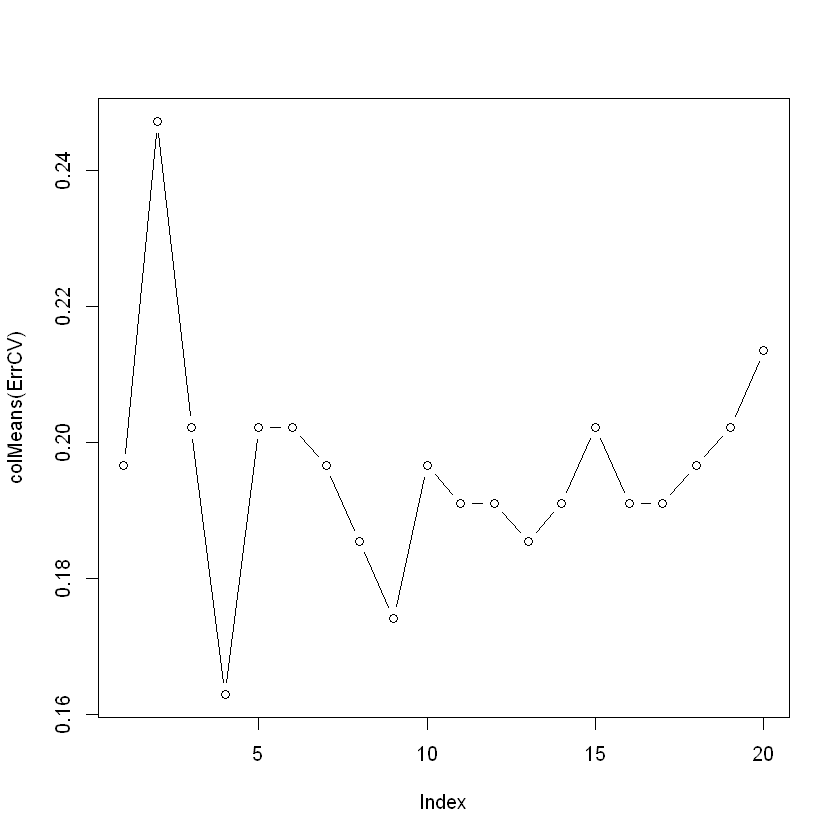

In [21]:
N = nrow(wine27)
X=wine27[,1:27]
Y=wine27$Type
ErrCV = matrix(NA,N,20)
for (k in 1:20) {
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],k)
        ErrCV[i,k] = sum(out != Y[-train])/length(out)
    }
}
plot(colMeans(ErrCV),type='b')
which.min(colMeans(ErrCV))

**here the smallest error is for k=9**

In [22]:
min(colMeans(ErrCV))

[1] 0.1629213

### 16% of error is quit high
**Best solution seems to be 9**

**But there are random in the search of the neighboor done by R, so if the algo is run several times, the result changes**

# Classification with LDA algorythm

Learning, prediction and calculation erro value - with split method

In [23]:
N = nrow(wine27)
X=wine27[,1:27]
Y=wine27$Type
train=sample(1:N,150)

f = lda(X[train,],Y[train])

#prediction step
yhat = predict(f,X[-train,])
sum(yhat$class != Y[-train])/length(yhat$class)


[1] 0

* yhat$class : gives the result

* yhat$posterior : gives the probability for each class

**Here LDA perfectly classify : err =0**

## LDA with 'leave one out' method

In [24]:
N = nrow(wine27)
X=wine27[,1:27]
Y=wine27$Type
ErrCV = rep(NA,N)
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = lda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }
mean(ErrCV)

[1] 0.01123596

**1.1% really better then KNN**

# Classification with Logistic Regression

We will use banknote dataset with binary classification

In [25]:
data(banknote)

In [26]:
head(banknote)

,Status,Length,Left,Right,Bottom,Top,Diagonal
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8
6,genuine,215.7,130.8,130.5,9.0,10.1,141.4


**Training, classification and calculation of the error**

with split method

In [27]:
N = nrow(banknote)
X=banknote[,-1]
Y=banknote$Status
train=sample(1:nrow(X),150)

f = glm(Status~.,data=banknote, subset = train,family = 'binomial')

out = predict(f,newdata = X[-train,])
yhat = (as.numeric(out) > 0) +  1
sum(yhat != as.numeric(Y[-train])) / length(yhat)

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] 0.02

The error is 4%

# Comparing Knn, LDA and Logistic Regression with leave one out method

In [28]:
N = nrow(banknote)
X=banknote[,-1]
Y=banknote$Status

ErrCV.kNN = rep(NA,N)
ErrCV.LDA = rep(NA,N)
ErrCV.LReg = rep(NA,N)
options(warn = -1)
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = lda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV.LDA[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = glm(Status~.,data=banknote, subset = train,family = 'binomial')

        out = predict(f,newdata = X[-train,])
        yhat = (as.numeric(out) > 0) +  1
        ErrCV.LReg[i] = sum(yhat != as.numeric(Y[-train])) / length(yhat)       
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],1)
        ErrCV.kNN[i] = sum(out != Y[-train])/length(out)
    }
options(warn=0)
mean(ErrCV.LDA)
mean(ErrCV.LReg)
mean(ErrCV.kNN)
Err = cbind(ErrCV.LDA,ErrCV.LReg,ErrCV.kNN)
colMeans(Err)


[1] 0.005

[1] 0.025

[1] 0.005

ErrCV.LDA ErrCV.LReg  ErrCV.kNN 
     0.005      0.025      0.005

### Comparaison of the 3 methods
KNN and LDA are best

Logistic Regression is 3rd

We can even calculate standard deviation (see below) and even confidence interval (to be done) with the errors calculated with leave one out methos

In [29]:
apply(Err,2,sd)

ErrCV.LDA ErrCV.LReg  ErrCV.kNN 
0.07071068 0.15651673 0.07071068

### Confirmation that the k=1 is the best parameter for Knn on banknote dataser

[1] 1

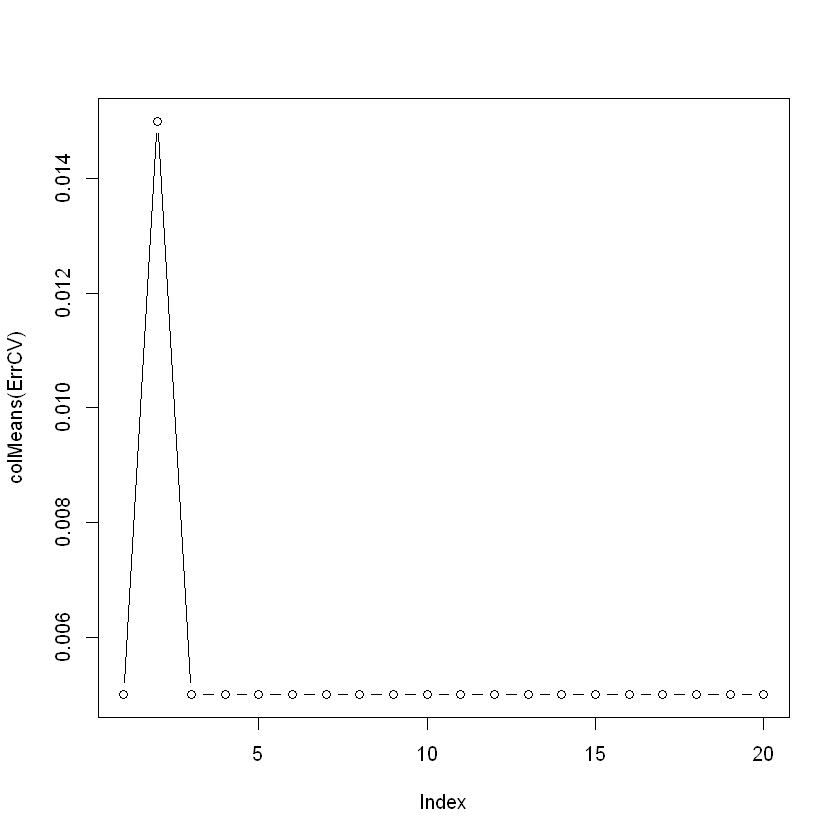

In [30]:
N = nrow(banknote)
X=banknote[,-1]
Y=banknote$Status
ErrCV = matrix(NA,N,20)
for (k in 1:20) {
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],k)
        ErrCV[i,k] = sum(out != Y[-train])/length(out)
    }
}
plot(colMeans(ErrCV),type='b')
which.min(colMeans(ErrCV))

### Comparison of Knn, Lda and Logistic Regression on swiss dataset

In [31]:
data(swiss)

The Classification is done on $Catholic variable.

The numerical variable is trnasformed into a boolean

In [32]:
X = swiss[,-5]
Y= swiss$Catholic >= 50

### find best k for Knn - using leave one out method


[1] 3

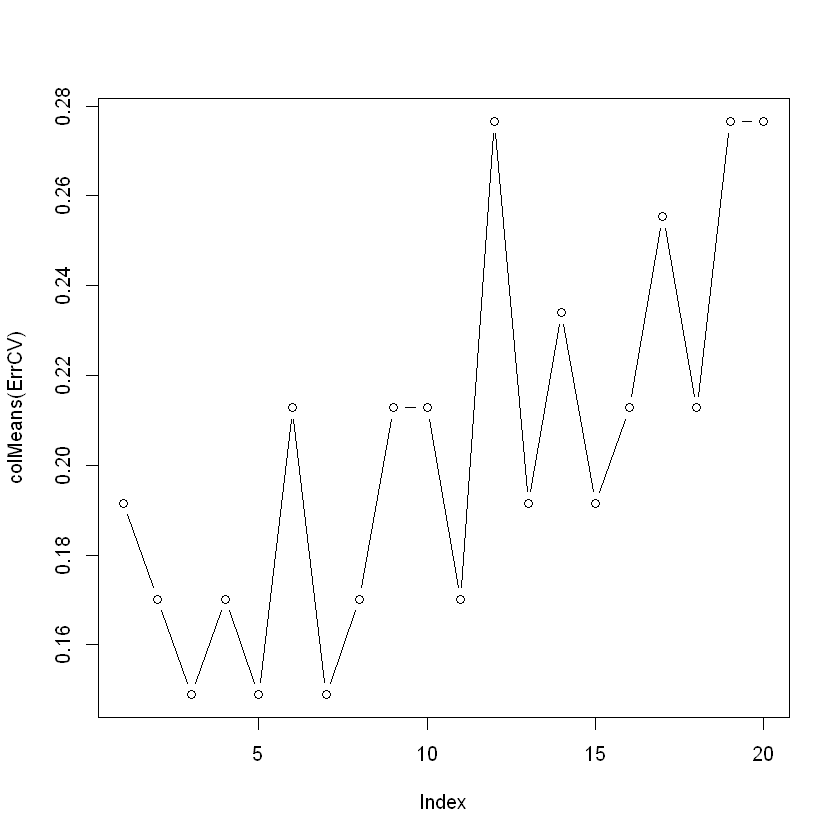

In [33]:
N = nrow(swiss)
X = swiss[,-5]
Y= swiss$Catholic >= 50
ErrCV = matrix(NA,N,20)
for (k in 1:20) {
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],k)
        ErrCV[i,k] = sum(out != Y[-train])/length(out)
    }
}
plot(colMeans(ErrCV),type='b')
which.min(colMeans(ErrCV))

K = 3

In [34]:
N = nrow(swiss)
X = swiss[,-5]
Y= swiss$Catholic >= 50
ErrCV.kNN = rep(NA,N)
ErrCV.LDA = rep(NA,N)
ErrCV.LReg = rep(NA,N)
options(warn=-1)
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = lda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV.LDA[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = glm((Catholic>50)~., data = swiss, subset = train,family = 'binomial')

        out = predict(f,newdata = X[-train,])
        yhat = (out > 0)
        ErrCV.LReg[i] = sum(yhat != (as.numeric(Y[-train]))) / length(yhat)     
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],3)
        ErrCV.kNN[i] = sum(out != Y[-train])/length(out)
    }
options(warn=0)   
#mean(ErrCV.LDA)
#mean(ErrCV.LReg)
#mean(ErrCV.kNN)
Err = cbind(ErrCV.LDA,ErrCV.LReg,ErrCV.kNN)
colMeans(Err)

ErrCV.LDA ErrCV.LReg  ErrCV.kNN 
 0.1489362  0.1276596  0.1489362

**For swiss dataset, Logistic regression is best method.**

# Classification with SVM


In [35]:
install.packages("e1071")

Installing package into 'C:/Users/erick/R'
(as 'lib' is unspecified)



package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\erick\AppData\Local\Temp\RtmpyudMa2\downloaded_packages


In [36]:
library(e1071)
library(class)
library(MASS)

Warning message:
"package 'e1071' was built under R version 4.0.2"


## Test SVM with linear kernel on Iris Dataset and compare with LDA

In [37]:
data(iris)
X=iris[,-5]
Y=as.numeric(iris$Species)


In [38]:
N = nrow(iris)

ErrCV.LDA = rep(NA,N)
ErrCV.SVM = rep(NA,N)
#options(warn=-1)
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = lda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV.LDA[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        fs = svm(X[train,],Y[train],type="C-classification",kernel='linear')
        yhat = predict(fs,X[-train,])
        ErrCV.SVM[i] = sum(yhat != Y[-train])       
    }
#options(warn=0)   
#mean(ErrCV.LDA)
#mean(ErrCV.LReg)
#mean(ErrCV.kNN)
Err = cbind(ErrCV.LDA,ErrCV.SVM)
apply(Err,2,sd)
colMeans(Err)

ErrCV.LDA ErrCV.SVM 
0.1404690 0.1966157

ErrCV.LDA ErrCV.SVM 
     0.02      0.04

**LDA is better then SVM**

In [39]:
N = nrow(iris)

ErrCV.LDA = rep(NA,N)
ErrCV.SVM = rep(NA,N)
#options(warn=-1)
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = lda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV.LDA[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        fs = svm(X[train,],Y[train],type="C-classification",kernel='radial',gamma=0.5)
        yhat = predict(fs,X[-train,])
        ErrCV.SVM[i] = sum(yhat != Y[-train])       
    }
#options(warn=0)   
#mean(ErrCV.LDA)
#mean(ErrCV.LReg)
#mean(ErrCV.kNN)
Err = cbind(ErrCV.LDA,ErrCV.SVM)
apply(Err,2,sd)
colMeans(Err)

ErrCV.LDA ErrCV.SVM 
0.1404690 0.1801069

ErrCV.LDA  ErrCV.SVM 
0.02000000 0.03333333

[1] 8

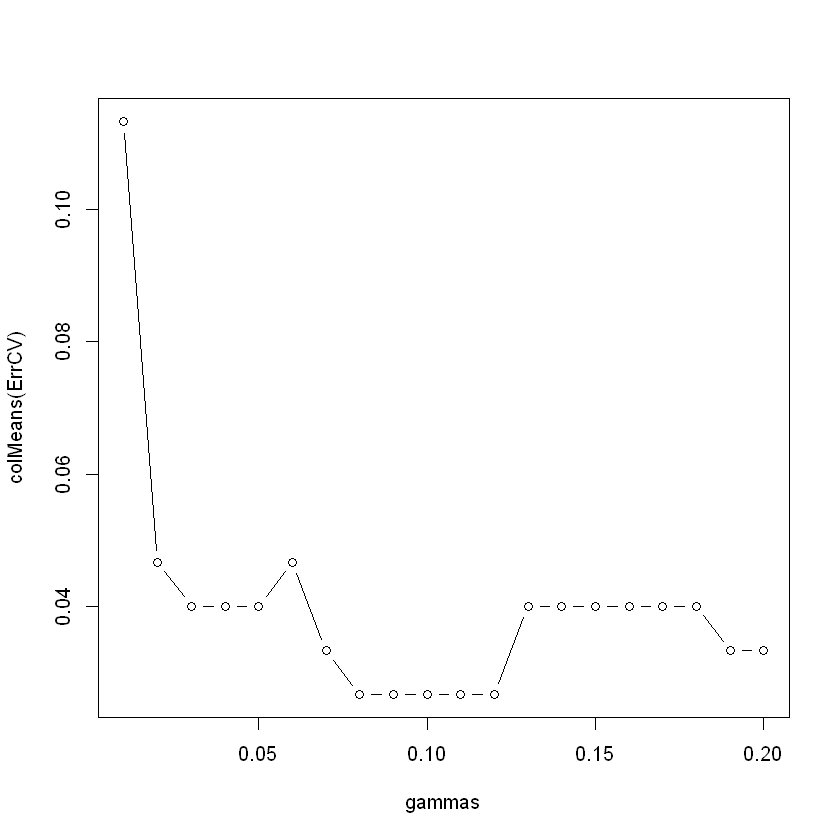

In [40]:
N = nrow(iris)
gammas = c((1:10)/100,0.1+(1:10)/100)
ErrCV = matrix(NA,N,length(gammas))

for (k in 1:length(gammas)) {
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        fs = svm(X[train,],Y[train],type="C-classification",kernel='radial',gamma=gammas[k])
        yhat = predict(fs,X[-train,])
        ErrCV[i,k] = sum(yhat != Y[-train])
    }
}
plot(gammas,colMeans(ErrCV),type='b')
which.min(colMeans(ErrCV))

**We find a minimum for gamma : 0.1**

We put this gamma = 0.1 in the comparaison with LDA

In [41]:
N = nrow(iris)

ErrCV.LDA = rep(NA,N)
ErrCV.SVM = rep(NA,N)
#options(warn=-1)
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = lda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV.LDA[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        fs = svm(X[train,],Y[train],type="C-classification",kernel='radial',gamma=0.5)
        yhat = predict(fs,X[-train,])
        ErrCV.SVM[i] = sum(yhat != Y[-train])       
    }
#options(warn=0)   
#mean(ErrCV.LDA)
#mean(ErrCV.LReg)
#mean(ErrCV.kNN)
Err = cbind(ErrCV.LDA,ErrCV.SVM)
apply(Err,2,sd)
colMeans(Err)

ErrCV.LDA ErrCV.SVM 
0.1404690 0.1801069

ErrCV.LDA  ErrCV.SVM 
0.02000000 0.03333333

**LDA is still better then SVM even with RBF**

# Comparison of KNN , LDA, QDA, SVM on the wine dataset

In [42]:
data(wine27)

### Best model for KNN

[1] 4

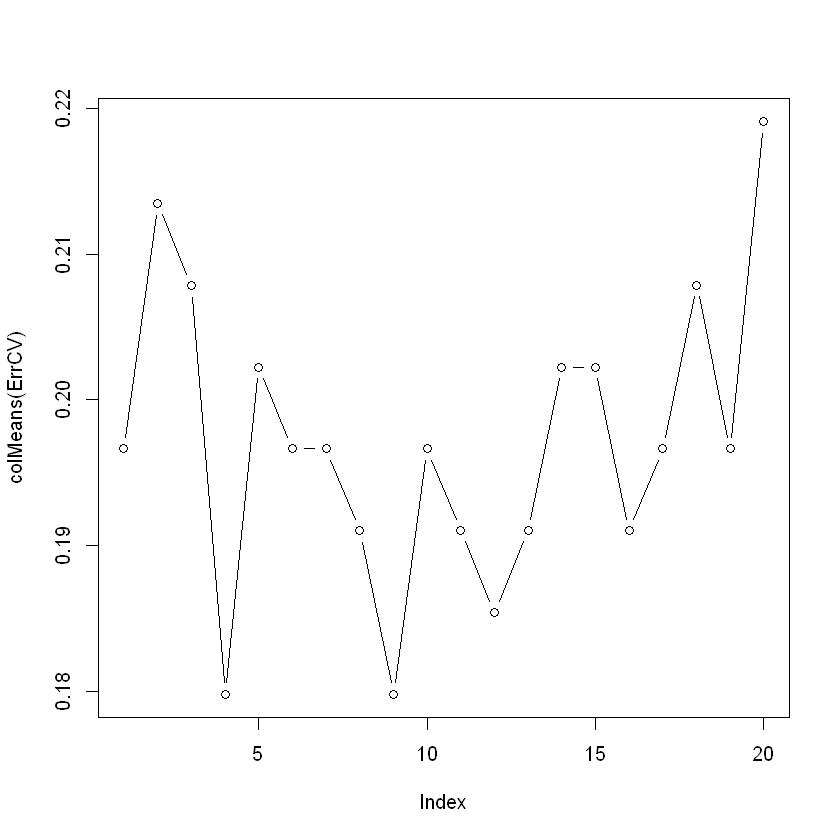

In [43]:
N = nrow(wine27)
X=wine27[,1:27]
Y=wine27$Type
ErrCV = matrix(NA,N,20)
for (k in 1:20) {
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],k)
        ErrCV[i,k] = sum(out != Y[-train])/length(out)
    }
}
plot(colMeans(ErrCV),type='b')
which.min(colMeans(ErrCV))

**Best K=9**

### Best model for SVM

[1] 0.042

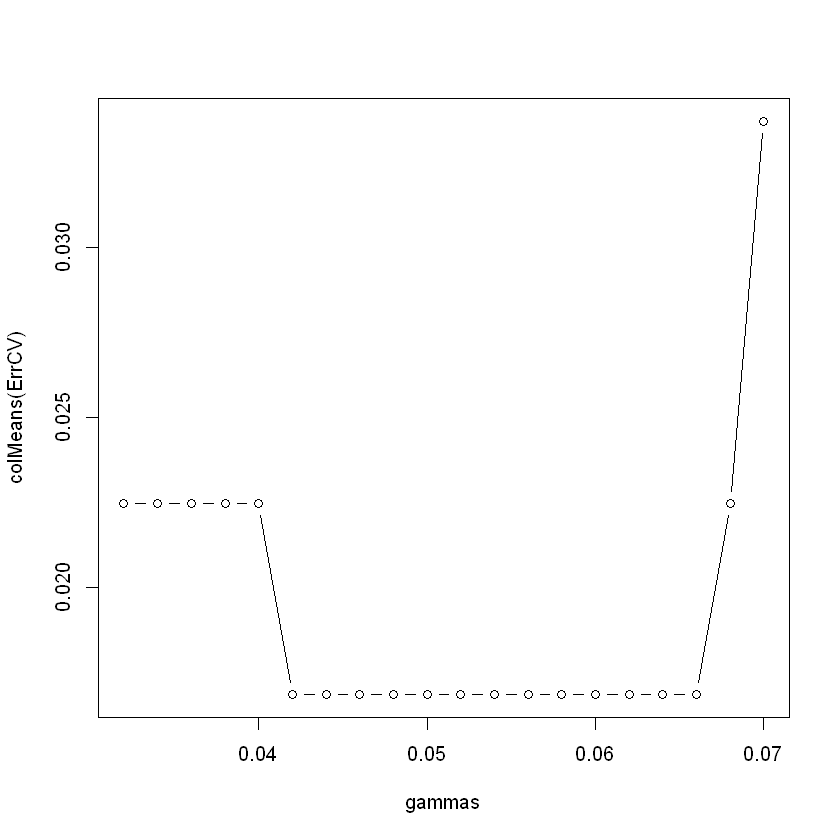

In [44]:
N = nrow(wine27)
X=wine27[,1:27]
Y=wine27$Type
gammas = c(0.03+(1:20)/500)
ErrCV = matrix(NA,N,length(gammas))

for (k in 1:length(gammas)) {
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        fs = svm(X[train,],Y[train],type="C-classification",kernel='radial',gamma=gammas[k])
        yhat = predict(fs,X[-train,])
        ErrCV[i,k] = sum(yhat != Y[-train])
    }
}
plot(gammas,colMeans(ErrCV),type='b')
gammas[which.min(colMeans(ErrCV))]

**Gamma=0.05 is the best value**

We can now compare the four methods

In [45]:
N = nrow(wine27)
X=wine27[,1:27]
Y=wine27$Type
ErrCV.KNN = rep(NA,N)
ErrCV.LDA = rep(NA,N)
ErrCV.QDA = rep(NA,N)
ErrCV.SVM = rep(NA,N)
#options(warn=-1)
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        out = knn(X[train,],X[-train,],Y[train],9)
        ErrCV.KNN[i] = sum(out != Y[-train])/length(out)
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = lda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV.LDA[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }
    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        f = qda(X[train,],Y[train])

        yhat = predict(f,X[-train,])
        ErrCV.QDA[i] = sum(yhat$class != Y[-train])/length(yhat$class)        
    }

    for (i in 1:nrow(X))
    {
        # Split between train and validation
        train = seq(1,nrow(X))[-i]
        fs = svm(X[train,],Y[train],type="C-classification",kernel='radial',gamma=0.05)
        yhat = predict(fs,X[-train,])
        ErrCV.SVM[i] = sum(yhat != Y[-train])       
    }
#options(warn=0)   
#mean(ErrCV.LDA)
#mean(ErrCV.LReg)
#mean(ErrCV.kNN)
Err = cbind(ErrCV.KNN,ErrCV.LDA,ErrCV.QDA,ErrCV.SVM)
apply(Err,2,sd)
colMeans(Err)

ErrCV.KNN ErrCV.LDA ErrCV.QDA ErrCV.SVM 
0.3803145 0.1056999 0.1809853 0.1290872

ErrCV.KNN  ErrCV.LDA  ErrCV.QDA  ErrCV.SVM 
0.17415730 0.01123596 0.03370787 0.01685393

**For this dataset the quality order is :**

* 1) LDA
* 2) SVM
* 3) QDA
* 4) KNN

In [46]:
length(predict(f,X[-train,]))

[1] 2